In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('preprocessed_untargeted.csv')

In [3]:
# Display all columns
pd.set_option('display.max_columns', None)

In [4]:
# Splitting Features (X) and Target (y)
X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

In [5]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Experimenting w/out Normalization

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Machine Learning Models
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=1000)
svm = SVC(random_state=42)

# Training Models
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predictions
rf_pred = rf.predict(X_test)
lr_pred = lr.predict(X_test)
svm_pred = svm.predict(X_test)

# Model Evaluation
print("Random Forest:\n", classification_report(y_test, rf_pred))
print("Logistic Regression:\n", classification_report(y_test, lr_pred))
print("SVM:\n", classification_report(y_test, svm_pred))

Random Forest:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       146
           1       0.94      0.95      0.94       154

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

Logistic Regression:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       146
           1       0.91      0.90      0.91       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

SVM:
               precision    recall  f1-score   support

           0       0.64      0.84      0.72       146
           1       0.78      0.55      0.64       154

    accuracy                           0.69       300
   macro avg       0.71      0.69      0.68       300
weighted avg       0.71      0

# Experimanting w/ Data Normalization

In [7]:
from sklearn.preprocessing import StandardScaler

# Data Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Models with Normalized Data
rf_scaled = RandomForestClassifier(random_state=42)
lr_scaled = LogisticRegression(random_state=42, max_iter=1000)
svm_scaled = SVC(random_state=42)

rf_scaled.fit(X_train_scaled, y_train)
lr_scaled.fit(X_train_scaled, y_train)
svm_scaled.fit(X_train_scaled, y_train)

# Predictions with Normalized Data
rf_scaled_pred = rf_scaled.predict(X_test_scaled)
lr_scaled_pred = lr_scaled.predict(X_test_scaled)
svm_scaled_pred = svm_scaled.predict(X_test_scaled)

# Model Evaluation with Normalized Data
print("Random Forest (Scaled):\n", classification_report(y_test, rf_scaled_pred))
print("Logistic Regression (Scaled):\n", classification_report(y_test, lr_scaled_pred))
print("SVM (Scaled):\n", classification_report(y_test, svm_scaled_pred))

Random Forest (Scaled):
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       146
           1       0.94      0.95      0.94       154

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

Logistic Regression (Scaled):
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       146
           1       0.97      0.95      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

SVM (Scaled):
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       146
           1       0.99      0.92      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
wei

# Model Evaluation and Feature Importance

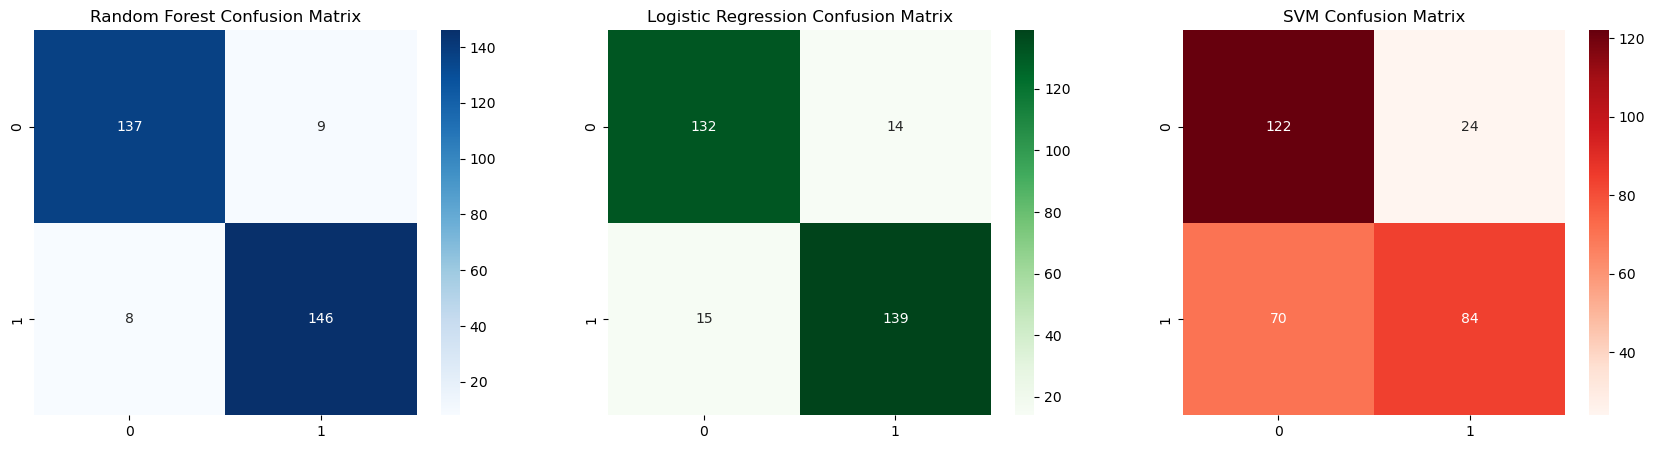


Feature Importance (Random Forest):

                      Feature  Importance
4        Daily Internet Usage    0.340821
1    Daily Time Spent on Site    0.254569
2                         Age    0.114100
3                 Area Income    0.109575
0                  Unnamed: 0    0.028111
..                        ...         ...
26             city_Pontianak    0.000574
34           city_Tasikmalaya    0.000545
31             city_Surakarta    0.000344
40  province_Kalimantan Barat    0.000237
59                       Year    0.000000

[63 rows x 2 columns]

Feature Importance (Random Forest Scaled):

                      Feature  Importance
4        Daily Internet Usage    0.340821
1    Daily Time Spent on Site    0.254569
2                         Age    0.114100
3                 Area Income    0.109575
0                  Unnamed: 0    0.028111
..                        ...         ...
26             city_Pontianak    0.000574
34           city_Tasikmalaya    0.000545
31          

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrices
rf_cm = confusion_matrix(y_test, rf_pred)
lr_cm = confusion_matrix(y_test, lr_pred)
svm_cm = confusion_matrix(y_test, svm_pred)

# Visualizing Confusion Matrices
plt.figure(figsize=(21, 5))

plt.subplot(1, 3, 1)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Reds')
plt.title('SVM Confusion Matrix')

plt.show()

# Feature Importance
print("\nFeature Importance (Random Forest):\n")
feature_importance_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
print(feature_importance_rf.sort_values(by='Importance', ascending=False))

print("\nFeature Importance (Random Forest Scaled):\n")
feature_importance_rf_scaled = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_scaled.feature_importances_})
print(feature_importance_rf_scaled.sort_values(by='Importance', ascending=False))

print("\nFeature Importance (Logistic Regression):\n")
feature_importance_lr = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr.coef_[0]})
print(feature_importance_lr.sort_values(by='Coefficient', ascending=False))

print("\nFeature Importance (Logistic Regression Scaled):\n")
feature_importance_lr_scaled = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_scaled.coef_[0]})
print(feature_importance_lr_scaled.sort_values(by='Coefficient', ascending=False))